In [1]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

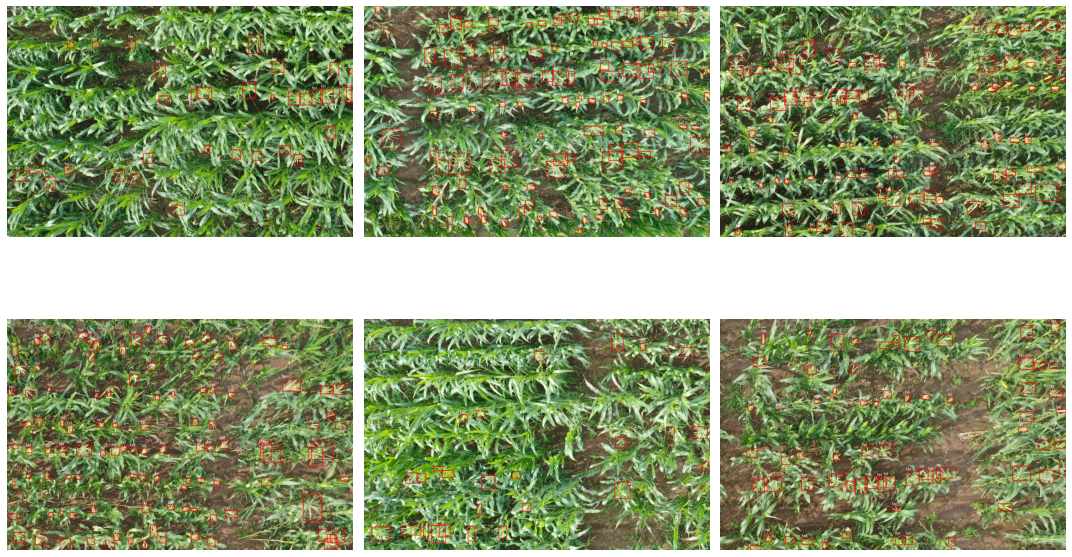

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/images"
labels_folder = "/home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 3)  # Увеличенная толщина
        font_scale = 1.0  # Увеличенный масштаб шрифта
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11s.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

New https://pypi.org/project/ultralytics/8.3.112 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml , epochs=80, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11s, name=First_try_2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

train: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/train/labels.cache... 485 images, 0 backgrounds, 0 corrupt: 100%|██████████| 485/485 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/user/CourseWork/datasets/Maize_Tassel_Small/valid/labels.cache... 124 images, 0 backgrounds, 0 corrupt: 100%|██████████| 124/124 [00:00<?, ?it/s]


Plotting labels to YOLO11s/First_try_2/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to YOLO11s/First_try_2
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80      12.8G      4.109      3.104      1.962        658        640: 100%|██████████| 16/16 [00:06<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.68it/s]

                   all        124       7610      0.164      0.206      0.102     0.0292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80      13.2G      2.583      1.564      1.157        630        640: 100%|██████████| 16/16 [00:03<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all        124       7610      0.734      0.225      0.404      0.133


2025-04-21 16:47:12,115 - clearml - INFO - inf value encountered. Reporting it as '0.0'. Use clearml.Logger.set_reporting_inf_value to assign another value

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      14.1G      2.374      1.378      1.091        397        640: 100%|██████████| 16/16 [00:03<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all        124       7610      0.165      0.666      0.434       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80        12G       2.31       1.34      1.066        730        640: 100%|██████████| 16/16 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all        124       7610      0.394      0.482      0.405      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      13.6G      2.252      1.282      1.064        460        640: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all        124       7610      0.537       0.52      0.491      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      12.4G      2.225      1.231      1.049        394        640: 100%|██████████| 16/16 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all        124       7610      0.639      0.562      0.573      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80        12G      2.216      1.225      1.045        656        640: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.65it/s]

                   all        124       7610      0.702      0.612      0.634      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      14.6G      2.108      1.157      1.038        410        640: 100%|██████████| 16/16 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        124       7610      0.755      0.637      0.694      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      13.3G      2.141      1.138      1.021        336        640: 100%|██████████| 16/16 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all        124       7610      0.778      0.646      0.708      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      11.5G      2.128      1.126      1.028        478        640: 100%|██████████| 16/16 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all        124       7610      0.776      0.648      0.714      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80        13G      2.109      1.136      1.037        231        640: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all        124       7610      0.724       0.66       0.69      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      11.7G      2.124      1.128      1.024        612        640: 100%|██████████| 16/16 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all        124       7610      0.767      0.676      0.728      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80      11.7G      2.106      1.124      1.019        557        640: 100%|██████████| 16/16 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all        124       7610      0.725      0.675      0.701      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      13.1G      2.067      1.084      1.014        690        640: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all        124       7610      0.764        0.7      0.734      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      12.8G      2.066      1.077      1.021        372        640: 100%|██████████| 16/16 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all        124       7610      0.765      0.675      0.719      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      12.2G      2.038      1.059      1.016        324        640: 100%|██████████| 16/16 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all        124       7610       0.79      0.685      0.737      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      10.5G       2.06      1.078      1.008        557        640: 100%|██████████| 16/16 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]

                   all        124       7610       0.78      0.686      0.746       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80        15G      2.031      1.045      1.008        633        640: 100%|██████████| 16/16 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.02it/s]

                   all        124       7610      0.783      0.714      0.757      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      13.5G       2.02      1.037      1.006        473        640: 100%|██████████| 16/16 [00:03<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        124       7610      0.781      0.705      0.746       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      11.9G      2.029       1.03       1.01        416        640: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        124       7610      0.776      0.697      0.741      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      12.8G      2.001      1.024      1.004        457        640: 100%|██████████| 16/16 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.94it/s]

                   all        124       7610      0.772      0.688      0.747      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      10.5G      2.012      1.031     0.9929        670        640: 100%|██████████| 16/16 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all        124       7610       0.81      0.702      0.772      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      12.3G       2.02      1.032      1.003        572        640: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all        124       7610      0.794      0.709      0.765      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80      13.1G      1.983      1.015      1.004        320        640: 100%|██████████| 16/16 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all        124       7610      0.803      0.706       0.76      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      15.6G      1.997      1.022      1.001        433        640: 100%|██████████| 16/16 [00:03<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all        124       7610      0.793      0.708      0.763      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      13.8G      2.014      1.029     0.9979        598        640: 100%|██████████| 16/16 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all        124       7610      0.805      0.696      0.761      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80        13G      2.014      1.034      1.002        391        640: 100%|██████████| 16/16 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        124       7610      0.806      0.723      0.772      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      14.3G      1.969     0.9979     0.9848        439        640: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all        124       7610      0.763        0.7      0.737      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      14.2G      1.978     0.9939     0.9946        513        640: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all        124       7610        0.8      0.693      0.771      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      11.9G      1.983      1.019     0.9975        556        640: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all        124       7610      0.794        0.7      0.769      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80        11G      1.964     0.9909     0.9964        535        640: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all        124       7610      0.805      0.705      0.772      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      12.1G      1.976     0.9916     0.9922        627        640: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all        124       7610      0.794      0.717      0.778      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80        19G      2.001      1.012     0.9927        442        640: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all        124       7610      0.785      0.715      0.771      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      13.9G      1.992      1.005     0.9939        515        640: 100%|██████████| 16/16 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all        124       7610      0.802      0.693      0.767      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80      13.9G      1.987      1.008     0.9962        539        640: 100%|██████████| 16/16 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        124       7610      0.791      0.717       0.77      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80        11G      1.964     0.9986     0.9839        473        640: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all        124       7610      0.809      0.725      0.787      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      14.4G      1.964     0.9966     0.9939        420        640: 100%|██████████| 16/16 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all        124       7610      0.821      0.729      0.795      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      14.8G       1.91     0.9539     0.9872        626        640: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all        124       7610      0.808      0.735      0.795      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      10.6G      1.929     0.9602     0.9919        451        640: 100%|██████████| 16/16 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all        124       7610      0.808      0.718      0.788      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      12.2G      1.927     0.9634     0.9941        473        640: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all        124       7610      0.822      0.722      0.788      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80        15G      1.921     0.9588     0.9865        466        640: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all        124       7610      0.803      0.735      0.784      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      13.9G      1.949     0.9727     0.9953        386        640: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all        124       7610      0.822      0.727       0.79      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      12.7G      1.944     0.9673     0.9852        534        640: 100%|██████████| 16/16 [00:03<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.93it/s]

                   all        124       7610      0.818      0.736      0.794       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      12.5G      1.914     0.9435     0.9927        408        640: 100%|██████████| 16/16 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all        124       7610      0.812      0.727      0.797       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80      11.9G      1.921      0.959     0.9865        508        640: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all        124       7610      0.772      0.695      0.751      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      11.1G      1.932     0.9676     0.9864        369        640: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all        124       7610      0.799      0.719      0.784      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      11.1G       1.92     0.9642       0.98        631        640: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all        124       7610      0.787      0.721      0.778      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80      11.4G      1.918     0.9431     0.9762        719        640: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all        124       7610      0.812      0.722      0.789      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      14.8G      1.921     0.9531     0.9805        493        640: 100%|██████████| 16/16 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all        124       7610      0.817      0.727      0.793      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      13.2G       1.93     0.9572     0.9854        620        640: 100%|██████████| 16/16 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all        124       7610      0.826      0.721        0.8      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80        12G      1.928     0.9501     0.9812        640        640: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all        124       7610      0.814       0.72      0.786      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80        12G      1.929     0.9612     0.9923        459        640: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all        124       7610      0.817      0.729      0.797      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      11.8G      1.914     0.9477     0.9798        406        640: 100%|██████████| 16/16 [00:03<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all        124       7610      0.818      0.734      0.797      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      11.4G      1.891       0.93     0.9774        643        640: 100%|██████████| 16/16 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all        124       7610      0.816      0.745      0.792      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      13.2G      1.918     0.9419     0.9785        480        640: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all        124       7610      0.802      0.734      0.791      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      12.7G      1.954     0.9745     0.9869        604        640: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all        124       7610      0.828      0.735      0.805       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      11.5G      1.893     0.9328     0.9679        512        640: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all        124       7610      0.832      0.738      0.807       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      15.1G      1.881      0.911     0.9712        704        640: 100%|██████████| 16/16 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all        124       7610      0.828      0.743      0.809      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80      12.7G      1.873     0.9039     0.9699        480        640: 100%|██████████| 16/16 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        124       7610       0.83      0.746      0.808      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      12.2G      1.922     0.9494     0.9884        465        640: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all        124       7610      0.821      0.737      0.801      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80        13G      1.908     0.9345     0.9808        632        640: 100%|██████████| 16/16 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all        124       7610      0.828      0.746      0.805      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      12.3G      1.894     0.9207     0.9705        562        640: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all        124       7610      0.818      0.741      0.798      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      11.8G      1.897       0.93     0.9682        665        640: 100%|██████████| 16/16 [00:03<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all        124       7610      0.821       0.73      0.801      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      13.9G      1.906     0.9303     0.9785        464        640: 100%|██████████| 16/16 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all        124       7610      0.832      0.741      0.813      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      14.1G       1.87     0.9151      0.972        569        640: 100%|██████████| 16/16 [00:03<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all        124       7610      0.816      0.742      0.797      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80        13G      1.863     0.8967     0.9691        453        640: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all        124       7610      0.824      0.744      0.806      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      12.5G      1.877     0.9078     0.9744        588        640: 100%|██████████| 16/16 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all        124       7610       0.82      0.743      0.802      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      13.1G      1.878     0.9074     0.9676        536        640: 100%|██████████| 16/16 [00:03<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all        124       7610      0.824      0.746      0.808      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      14.2G      1.885     0.9135     0.9686        454        640: 100%|██████████| 16/16 [00:03<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all        124       7610       0.82      0.743      0.804      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80        13G      1.868     0.8976      0.965        426        640: 100%|██████████| 16/16 [00:03<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all        124       7610      0.822      0.736        0.8       0.37


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      10.2G      1.859     0.9704     0.9923        325        640: 100%|██████████| 16/16 [00:07<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all        124       7610      0.816      0.728      0.794      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      9.88G      1.821      0.899     0.9831        257        640: 100%|██████████| 16/16 [00:03<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        124       7610      0.816      0.725      0.794      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      10.5G      1.816     0.8941     0.9775        201        640: 100%|██████████| 16/16 [00:03<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]

                   all        124       7610      0.821      0.734      0.802      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      10.3G      1.788     0.8771     0.9745        265        640: 100%|██████████| 16/16 [00:03<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all        124       7610      0.822      0.732      0.803       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      9.87G       1.85     0.9086     0.9828        270        640: 100%|██████████| 16/16 [00:03<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all        124       7610       0.82      0.734      0.806      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      10.5G      1.791     0.8648     0.9703        329        640: 100%|██████████| 16/16 [00:03<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.09it/s]

                   all        124       7610      0.825      0.734      0.806      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80      10.3G      1.832      0.903      0.989        179        640: 100%|██████████| 16/16 [00:03<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all        124       7610      0.822      0.738      0.803      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      10.9G      1.805     0.8694     0.9797        358        640: 100%|██████████| 16/16 [00:03<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all        124       7610       0.82      0.737      0.804      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      9.96G      1.776       0.86     0.9814        390        640: 100%|██████████| 16/16 [00:03<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all        124       7610      0.822       0.74      0.807      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      9.04G      1.779     0.8466     0.9719        253        640: 100%|██████████| 16/16 [00:03<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all        124       7610      0.823      0.742      0.809      0.374



80 epochs completed in 0.119 hours.
Optimizer stripped from YOLO11s/First_try_2/weights/last.pt, 19.2MB
Optimizer stripped from YOLO11s/First_try_2/weights/best.pt, 19.2MB

Validating YOLO11s/First_try_2/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.03s/it]


                   all        124       7610      0.831      0.741      0.813      0.378
Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to YOLO11s/First_try_2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd3f07ac100>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

2025-04-21 16:54:30,324 - clearml.storage - INFO - Uploading: 18.28MB to YOLO11s/First_try_2/weights/best.pt


████████████████▉                55% | 10.00/18.28 MB [00:00<00:00, 42.38MB/s]: 

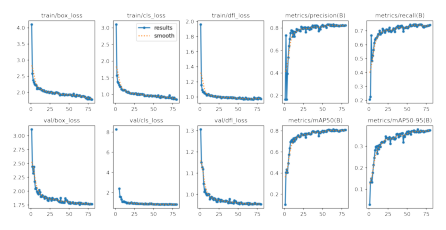

██████████████████████████████▉ 100% | 18.27/18.28 MB [00:00<00:00, 19.11MB/s]: 

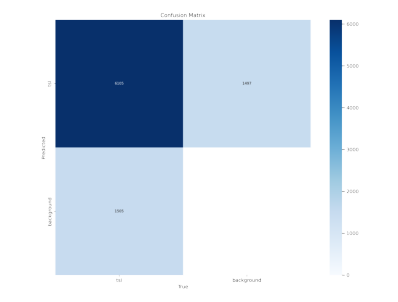

/home/user/.local/lib/python3.10/site-packages/tqdm/std.py:636: TqdmWarning: clamping frac to range [0, 1]
  full_bar = Bar(frac,
███████████████████████████████ 100% | 18.28/18.28 MB [00:01<00:00, 15.35MB/s]: 

2025-04-21 16:54:31,526 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/YOLO11s/First_try_2.63c1c02116ec4c99b843d14a2f6c348d/models/best.pt


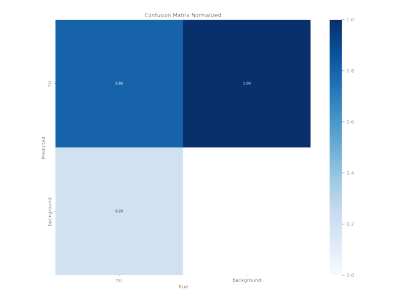

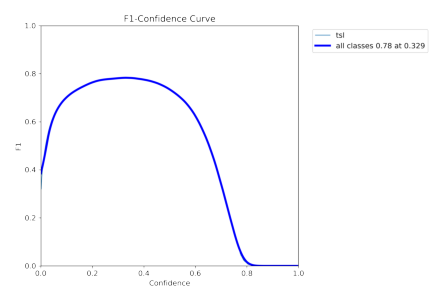

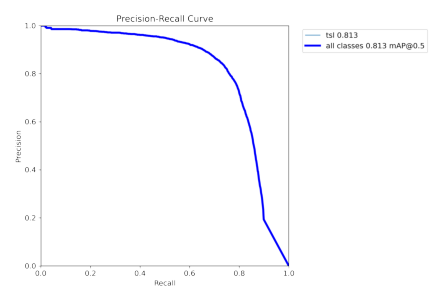

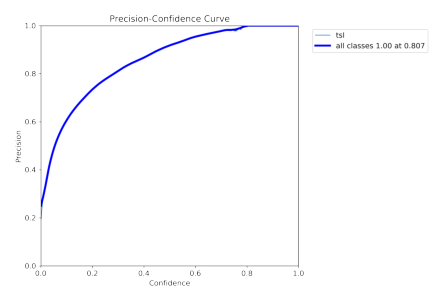

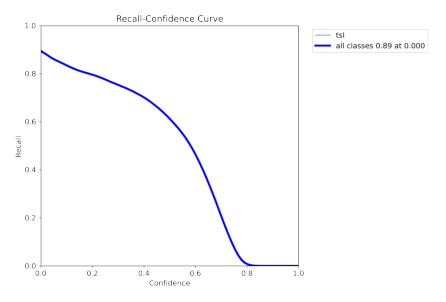

In [5]:
model.train(data='data.yaml ', epochs=80, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11s', name='First_try_2',
            batch=32, device=device, seed=69)

In [6]:
df = pd.read_csv('YOLO11s/First_try_2/results.csv')

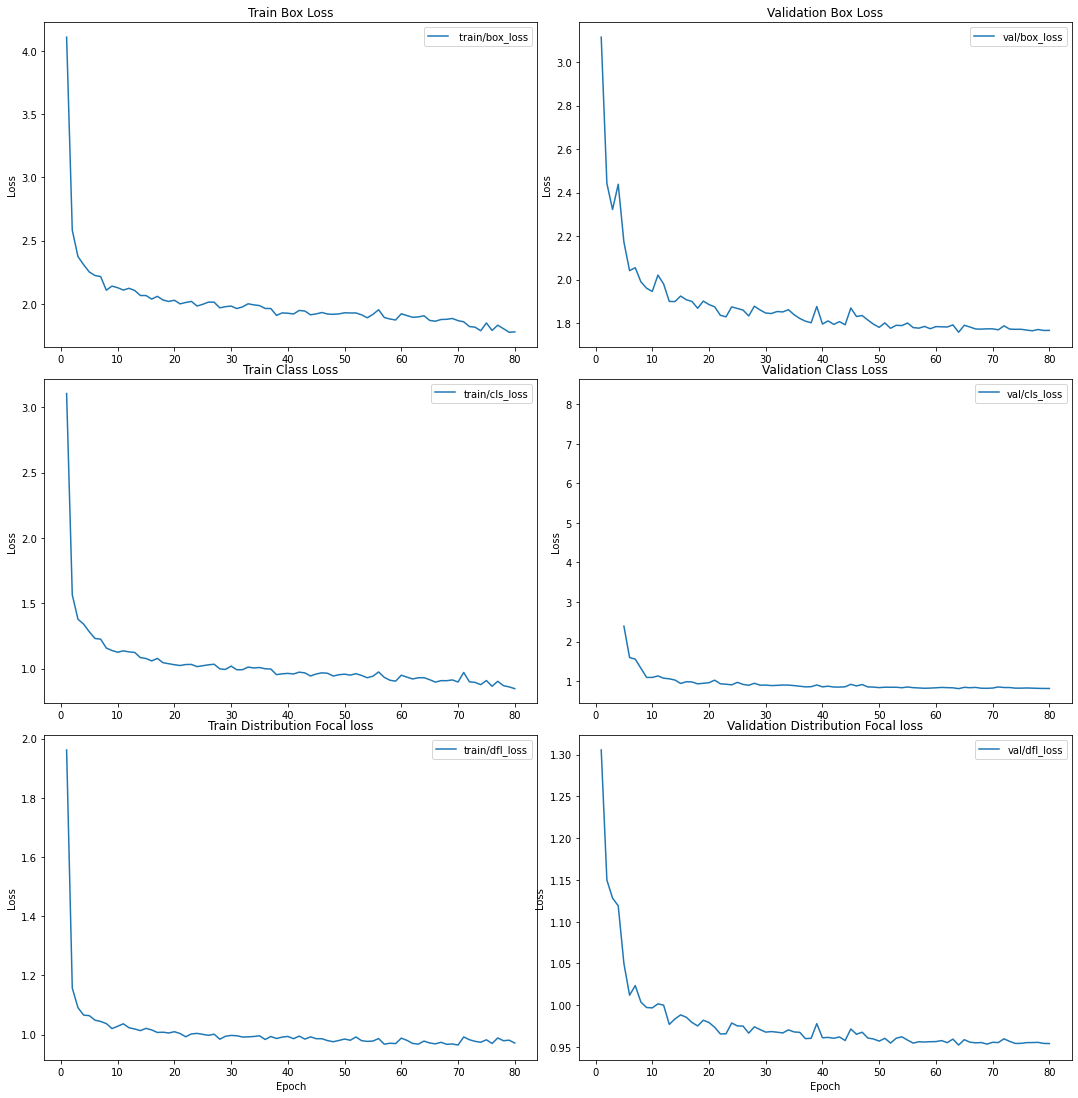

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

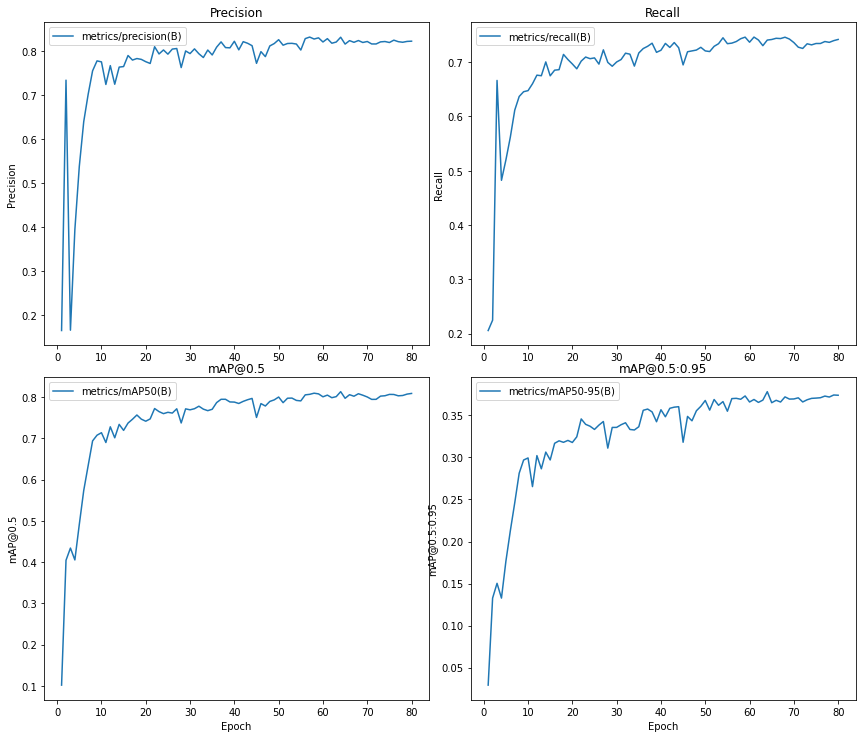

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

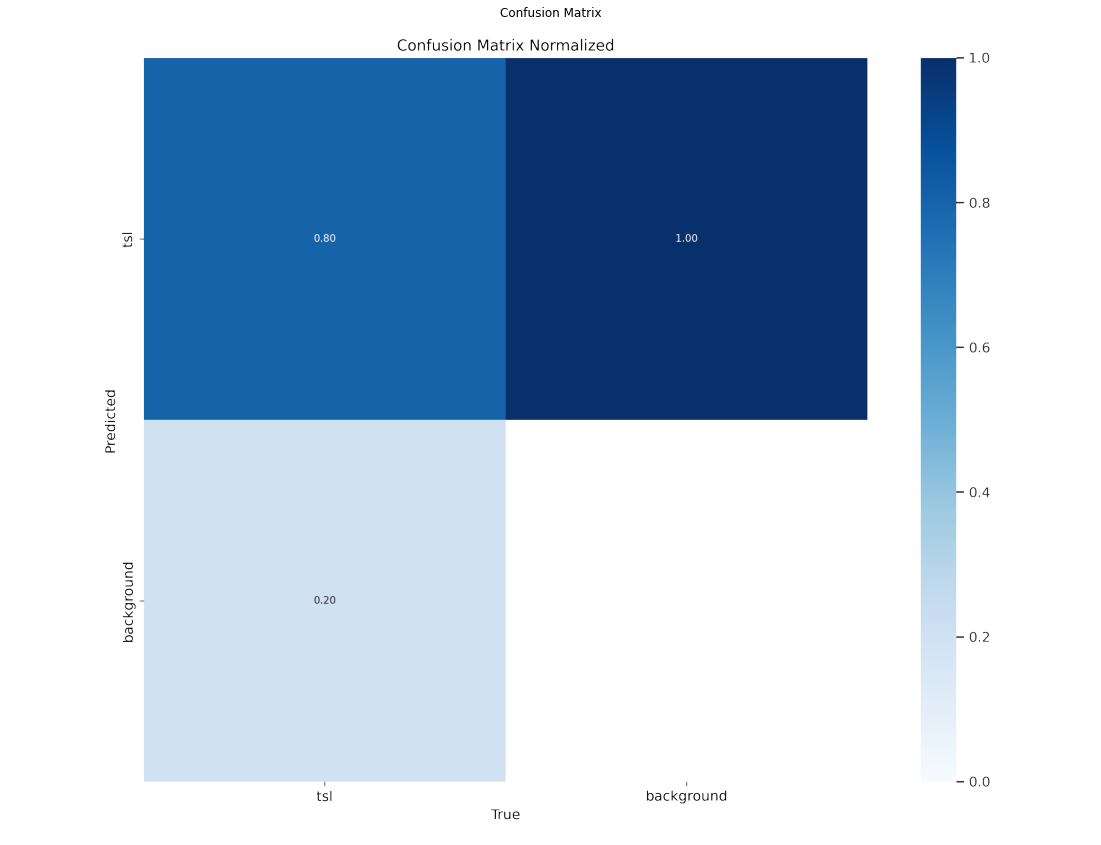

In [9]:
confusion_matrix = Image.open("YOLO11s/First_try_2/confusion_matrix_normalized.png")
plt.figure(figsize=(20, 15))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg: 448x640 41 tsls, 181.0ms
Speed: 22.7ms preprocess, 181.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


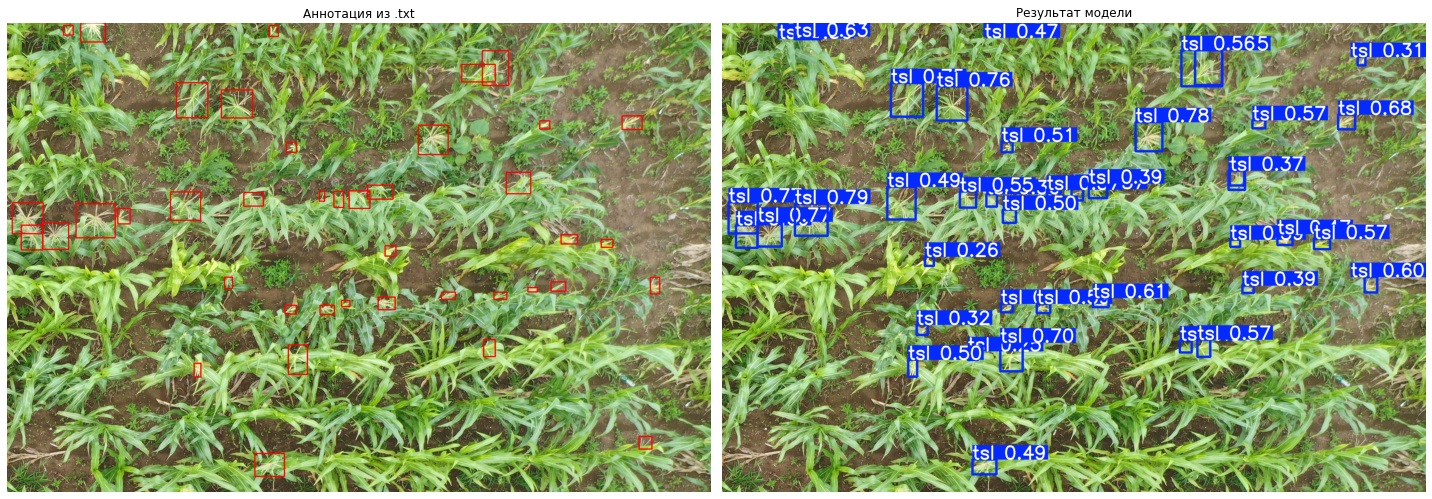

In [11]:
import cv2
import matplotlib.pyplot as plt
import os

image_path = '/home/user/CourseWork/datasets/Maize_Tassel_Small/test/images/DJI_0103-2-_1_0_jpg.rf.b647a7f2d546429c7f2e8d7e824c8fc9.jpg'
label_path = image_path.replace('/images/', '/labels/').replace('.jpg', '.txt')

# Загружаем оригинальное изображение
orig_img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
height, width = orig_img.shape[:2]

# Загружаем аннотации
with open(label_path, 'r') as f:
    boxes = f.readlines()

# Рисуем боксы
for box in boxes:
    cls, x_center, y_center, w, h = map(float, box.strip().split())
    x1 = int((x_center - w / 2) * width)
    y1 = int((y_center - h / 2) * height)
    x2 = int((x_center + w / 2) * width)
    y2 = int((y_center + h / 2) * height)
    cv2.rectangle(orig_img, (x1, y1), (x2, y2), (255, 0, 0), 3)

# Прогоняем изображение через модель
res = model(image_path)
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

# Отображаем оба изображения
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
axes[0].imshow(orig_img)
axes[0].set_title("Аннотация из .txt")
axes[0].axis('off')

axes[1].imshow(detect_img)
axes[1].set_title("Результат модели")
axes[1].axis('off')

plt.tight_layout()
plt.show()
